# Antes de empezar :
   - Estos ejercicios están relacionados con las lecciones Subconjunto y Estadísticas descriptivas.
   - Tenga en cuenta que necesitará utilizar algunas de las funciones que aprendió en las lecciones anteriores.
   - Todos los conjuntos de datos se proporcionan en la carpeta `your-code` de este laboratorio.
   - Elabora tus códigos y resultados tanto como puedas.
   - Esfuérzate al máximo para responder a las preguntas y completar las tareas y, sobre todo, ¡¡¡disfruta del proceso!!!

#### Importa todas las librerías necesarias

In [3]:
# import libraries here
import pandas as pd
import matplotlib.pyplot as plt

# Desafío 1

#### En este reto utilizaremos el archivo `Temp_States.csv`. 

#### Primero impórtalo en un marco de datos llamado `temp`.

In [2]:
file_path = './Temp_States.csv'
temp = pd.read_csv(file_path)

#### Print `temp`

In [3]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore los tipos de datos del marco de datos Temp. ¿Qué tipo de datos tenemos? Comenta tu resultado.

In [4]:
print(temp.dtypes)

City            object
State           object
Temperature    float64
dtype: object


#### Selecciona las filas en las que el estado es New York

In [5]:
ny_rows = temp[temp['State'] == 'New York']
print(ny_rows)

      City     State  Temperature
0      NYC  New York    19.444444
1   Albany  New York     9.444444
2  Buffalo  New York     3.333333


#### ¿Cuál es la temperatura media de las ciudades de Nueva York?

In [6]:
ny_mean_temp = ny_rows['Temperature'].mean()
print(f'Temperatura media de las ciudades de Nueva York: {ny_mean_temp:.2f} grados centígrados')

Temperatura media de las ciudades de Nueva York: 10.74 grados centígrados


#### Queremos conocer las ciudades y estados con temperaturas superiores a 15 grados centígrados.

In [7]:
above_15 = temp[temp['Temperature'] > 15]
print(above_15)

       City        State  Temperature
0       NYC     New York    19.444444
3  Hartford  Connecticut    17.222222
5    Treton   New Jersey    22.222222
6    Newark   New Jersey    20.000000


#### Ahora, devuelva sólo las ciudades que tengan una temperatura superior a 15 grados centígrados.

In [8]:
cities_above_15 = above_15['City']
print(cities_above_15)

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object


#### Queremos saber qué ciudades tienen una temperatura superior a 15 grados Celcius e inferior a 20 grados Celcius

*Pista: Primero escriba la condición y luego seleccione las filas.

In [9]:
state_stats = temp.groupby('State')['Temperature'].agg(['mean', 'std'])
print(state_stats)

                  mean       std
State                           
Connecticut  15.833333  1.964186
New Jersey   21.111111  1.571348
New York     10.740741  8.133404


In [10]:
temp['State'].value_counts()

State
New York       3
Connecticut    2
New Jersey     2
Name: count, dtype: int64

#### Halla la media y la desviación estándar de la temperatura de cada estado.

*Pista: Utiliza las funciones de la lección Manipulación de datos*.

In [11]:
state_stats = temp.groupby('State')['Temperature'].agg(['mean', 'std'])
print(state_stats)

                  mean       std
State                           
Connecticut  15.833333  1.964186
New Jersey   21.111111  1.571348
New York     10.740741  8.133404


# Desafío 2

#### Cargar el fichero `employee.csv` en un DataFrame. Llama al dataframe `employee`.

In [4]:
file_path = './Employee.csv'
employee = pd.read_csv(file_path)

#### Explore los tipos de datos del marco de datos Temp. Comenta tus resultados

In [14]:
print(employee.dtypes)

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object


#### Muestre visualmente la distribución de frecuencias (histograma) del conjunto de datos de empleados. Describa en pocas palabras estos histogramas.

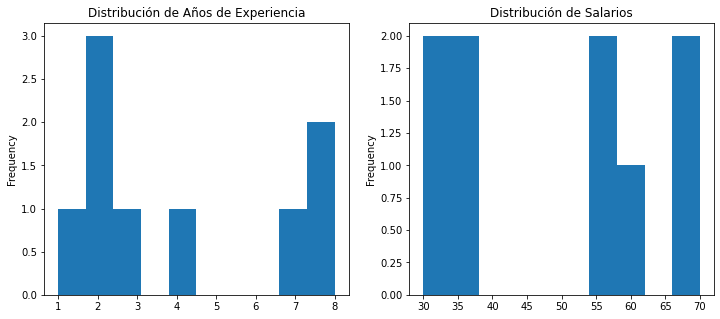

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
employee['Years'].plot(kind='hist', ax=axs[0], title='Distribución de Años de Experiencia', bins=10)
employee['Salary'].plot(kind='hist', ax=axs[1], title='Distribución de Salarios', bins=10)
plt.show()

#### ¿Cuál es el salario medio en esta empresa?

In [16]:
average_salary = employee['Salary'].mean()
print(f"El salario medio en esta empresa es: {average_salary}")

El salario medio en esta empresa es: 48.888888888888886


#### ¿Cuál es el salario más alto?

In [17]:
highest_salary = employee['Salary'].max()
print(f"El salario más alto es: {highest_salary}")

El salario más alto es: 70


#### ¿Cuál es el salario más bajo?

In [18]:
lowest_salary = employee['Salary'].min()
print(f"El salario más bajo es: {lowest_salary}")

El salario más bajo es: 30


#### ¿Quiénes son los empleados con el salario más bajo?

In [30]:
employees_with_lowest_salary = employee[employee['Salary'] == lowest_salary]
print(employees_with_lowest_salary)

    Name Department Education Gender    Title  Years  Salary
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


#### ¿Podría darnos toda la información sobre un empleado llamado David?

In [31]:
employee_david = employee[employee['Name'] == 'David']
print(employee_david)

    Name Department Education Gender    Title  Years  Salary
2  David         HR    Master      M  analyst      2      30


#### ¿Podría dar sólo el sueldo de David?

In [32]:
salary_david = employee_david['Salary'].values
print(f"El sueldo de David es: {salary_david}")

El sueldo de David es: [30]


#### Printea todas las líneas en las que el cargo es asociado

In [33]:
associates = employee[employee['Title'] == 'associate']
print(associates)

     Name Department Education Gender      Title  Years  Salary
4  Samuel      Sales    Master      M  associate      3      55
5     Eva      Sales  Bachelor      F  associate      2      55
7   Pedro         IT       Phd      M  associate      7      60


#### Printea las 3 primeras filas de tu dataframe

##### Consejo : Hay 2 maneras de hacerlo. Hazlo de las dos maneras

In [34]:
print(employee.head(3))

    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


In [35]:
print(employee.iloc[:3])

    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


#### ¿Encuentra a los empleados cuyo cargo es asociado y cuyo salario es superior a 55?

In [36]:
associates_with_high_salary = employee[(employee['Title'] == 'associate') & (employee['Salary'] > 55)]
print(associates_with_high_salary)

    Name Department Education Gender      Title  Years  Salary
7  Pedro         IT       Phd      M  associate      7      60


#### Agrupa a los empleados en función del número de años que llevan trabajando. ¿Cuáles son los salarios medios de cada grupo?

In [37]:
average_salary_by_years = employee.groupby('Years')['Salary'].mean()
print(average_salary_by_years)

Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64


#### ¿Cuál es el salario medio por título?

In [38]:
average_salary_by_title = employee.groupby('Title')['Salary'].mean()
print(average_salary_by_title)

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64


#### Muestra un resumen visual de los datos utilizando boxplot. ¿Cuáles son los cuartiles primero y tercero? Comenta tus resultados.

* Pista : Cuantiles vs Cuartiles*.
En Probabilidad y Estadística, los cuantiles son puntos de corte que dividen el rango de una distribución de probabilidad en intervalos continuos con probabilidades iguales. Cuando la división es en cuatro partes, los valores de la variable correspondientes al 25%, 50% y 75% de la distribución total se denominan cuartiles.

<Figure size 720x432 with 0 Axes>

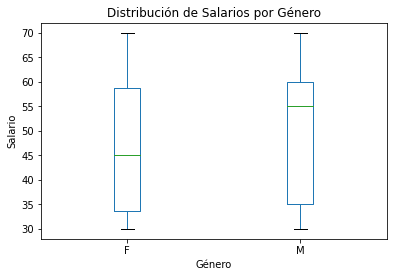

Primer cuartil (Q1): 35.0
Tercer cuartil (Q3): 60.0


In [40]:
plt.figure(figsize=(10, 6))
employee.boxplot(column='Salary', by='Gender', grid=False)
plt.title('Distribución de Salarios por Género')
plt.suptitle('')
plt.xlabel('Género')
plt.ylabel('Salario')
plt.show()

# Calcular los cuartiles primero (Q1) y tercero (Q3) para los salarios
Q1 = employee['Salary'].quantile(0.25)
Q3 = employee['Salary'].quantile(0.75)

print(f"Primer cuartil (Q1): {Q1}")
print(f"Tercer cuartil (Q3): {Q3}")

#### ¿Es diferente el salario medio por género?

In [39]:
average_salary_by_gender = employee.groupby('Gender')['Salary'].mean()

print("Salario medio por género:")
print(average_salary_by_gender)

Salario medio por género:
Gender
F    47.5
M    50.0
Name: Salary, dtype: float64


#### Encuentra el mínimo, la media y el máximo de todas las columnas numéricas para cada Departamento.

##### Sugerencia: Utiliza las funciones de la lección Manipulación de Datos

In [5]:
# Group by 'Department' and calculate the min, mean, and max for numeric columns
department_stats = employee.groupby('Department').agg(['min', 'mean', 'max'])

# Display the resulting DataFrame
department_stats

TypeError: agg function failed [how->mean,dtype->object]

### Pregunta bonus

#### Para cada departamento, calcule la diferencia entre el salario máximo y el salario mínimo.

##### * Sugerencia: pruebe a utilizar `agg` o `apply` y `lambda`*.

In [ ]:
# your answer here


# Desafío 3

#### Abra el conjunto de datos Orders.csv. Nombre el conjunto de datos pedidos

In [7]:
# Load the new data file
orders_file_path = './Orders.csv'
orders_data = pd.read_csv(orders_file_path)

#### Explore su conjunto de datos observando los tipos de datos y las estadísticas de resumen. Comenta tus resultados

In [8]:
# Display data types and summary statistics
data_types = orders_data.dtypes
summary_statistics = orders_data.describe(include='all')

# Display the results
data_types

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [9]:
# your answer here
summary_statistics

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
count,397924.000000,397924.000000,397924,397924.000000,397924.000000,397924.000000,397924.000000,397924,397924.000000,397924,397924.000000,397924.000000,397924,397924.000000
unique,NaN,NaN,3665,NaN,NaN,NaN,NaN,3877,NaN,17286,NaN,NaN,37,NaN
top,NaN,NaN,85123A,NaN,NaN,NaN,NaN,white hanging heart t-light holder,NaN,2011-11-14 15:27:00,NaN,NaN,United Kingdom,NaN
freq,NaN,NaN,2035,NaN,NaN,NaN,NaN,2028,NaN,542,NaN,NaN,354345,NaN
mean,278465.221859,560617.126645,NaN,2010.934259,7.612537,3.614555,12.728247,NaN,13.021823,NaN,3.116174,15294.315171,NaN,22.394749
std,152771.368303,13106.167695,NaN,0.247829,3.416527,1.928274,2.273535,NaN,180.420210,NaN,22.096788,1713.169877,NaN,309.055588
min,0.000000,536365.000000,NaN,2010.000000,1.000000,1.000000,6.000000,NaN,1.000000,NaN,0.000000,12346.000000,NaN,0.000000
25%,148333.750000,549234.000000,NaN,2011.000000,5.000000,2.000000,11.000000,NaN,2.000000,NaN,1.250000,13969.000000,NaN,4.680000
50%,284907.500000,561893.000000,NaN,2011.000000,8.000000,3.000000,13.000000,NaN,6.000000,NaN,1.950000,15159.000000,NaN,11.800000
75%,410079.250000,572090.000000,NaN,2011.000000,11.000000,5.000000,14.000000,NaN,12.000000,NaN,3.750000,16795.000000,NaN,19.800000


#### ¿Cuál es el precio medio de compra?

In [10]:
# your answer here
mean_unit_price = orders_data['UnitPrice'].mean()

mean_unit_price

3.1161744805540756

#### ¿Cuáles fueron los precios de compra más altos y más bajos? 

In [12]:
# your answer here
max_unit_price = orders_data['UnitPrice'].max()

max_unit_price

8142.75

In [13]:
# your answer here
min_unit_price = orders_data['UnitPrice'].min()

min_unit_price

0.0

#### Seleccione todos los clientes que tenemos en España

In [14]:
# your answer here
customers_spain = orders_data[orders_data['Country'] == 'Spain']['CustomerID'].unique()
customers_spain

array([12557, 17097, 12540, 12551, 12484, 12539, 12510, 12421, 12502,
       12462, 12507, 12541, 12547, 12597, 12545, 12596, 12354, 12417,
       12455, 12450, 12548, 12556, 12550, 12546, 12454, 12448, 12544,
       12538, 12445, 12442])

#### ¿Cuántos clientes tenemos en España?
##### Pista : Utiliza value_counts()

In [16]:
customers_spain_count = orders_data['Country'].value_counts().get('Spain', 0)

customers_spain_count


2485

#### Selecciona todos los clientes que han comprado más de 50 artículos ?

In [17]:
# your answer here
customers_more_than_50_items = orders_data[orders_data['Quantity'] > 50]['CustomerID'].unique()
customers_more_than_50_items

array([13748, 15291, 14688, ..., 15877, 13298, 16446])

#### Selecciona pedidos de España superiores a 50 artículos

In [18]:
# your answer here
orders_spain_more_than_50 = orders_data[(orders_data['Country'] == 'Spain') & (orders_data['Quantity'] > 50)]
orders_spain_more_than_50

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
32454,52416,540785,84997B,2011,1,2,11,red 3 piece retrospot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
32455,52417,540785,84997D,2011,1,2,11,pink 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32456,52418,540785,84997C,2011,1,2,11,blue 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32457,52419,540785,84997A,2011,1,2,11,green 3 piece polkadot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
91155,136767,547972,22383,2011,3,1,16,lunch bag suki design,150,2011-03-28 16:41:00,1.45,12557,Spain,217.50


#### Seleccionar todos los pedidos gratuitos

In [19]:
# your answer here
free_orders = orders_data[orders_data['UnitPrice'] == 0]
free_orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
34494,56674,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0
53788,86789,543599,84535B,2011,2,4,13,fairy cakes notebook a6 size,16,2011-02-10 13:08:00,0.0,17560,United Kingdom,0.0
85671,130188,547417,22062,2011,3,3,10,ceramic bowl with love heart design,36,2011-03-23 10:25:00,0.0,13239,United Kingdom,0.0
92875,139453,548318,22055,2011,3,3,12,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0
97430,145208,548871,22162,2011,4,1,14,heart garland rustic padded,2,2011-04-04 14:42:00,0.0,14410,United Kingdom,0.0


#### Seleccionar todos los pedidos que sean 'lunch bag
#### Pista: Utilice las funciones de cadena

In [20]:
# your answer here
lunch_bag_orders = orders_data[orders_data['Description'].str.contains('lunch bag', case=False, na=False)]
lunch_bag_orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Seleccione todos los pedidos realizados en 2011 y que sean «lunch bag».  

In [21]:
# your answer here
lunch_bag_orders_2011 = orders_data[(orders_data['year'] == 2011) & (orders_data['Description'].str.contains('lunch bag', case=False, na=False))]
lunch_bag_orders_2011

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Muestra la distribución de frecuencias del importe gastado en España.

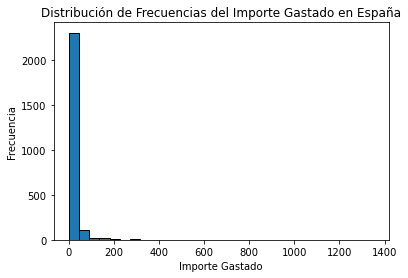

In [22]:
# your answer here
import matplotlib.pyplot as plt

amount_spent_spain = orders_data[orders_data['Country'] == 'Spain']['amount_spent']
plt.hist(amount_spent_spain, bins=30, edgecolor='k')
plt.title('Distribución de Frecuencias del Importe Gastado en España')
plt.xlabel('Importe Gastado')
plt.ylabel('Frecuencia')
plt.show()

#### Seleccione todos los pedidos realizados en el mes de agosto

In [23]:
# your answer here
orders_august = orders_data[orders_data['month'] == 8]
orders_august

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,320688,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,320689,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,320690,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,320691,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Seleccione cuántos pedidos se realizan por países en el mes de agosto
##### Pista: Utilice value_counts()

In [24]:
# your answer here
orders_august_by_country = orders_august['Country'].value_counts()
orders_august_by_country

Country
United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: count, dtype: int64

#### ¿Cuál es el gasto medio por país?

In [25]:
# your answer here
mean_spent_by_country = orders_data.groupby('Country')['amount_spent'].mean()
mean_spent_by_country

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### ¿Cuál es el artículo más caro?

In [26]:
# your answer here
most_expensive_item = orders_data.loc[orders_data['UnitPrice'].idxmax()]
most_expensive_item

Unnamed: 0                   173382
InvoiceNo                    551697
StockCode                      POST
year                           2011
month                             5
day                               2
hour                             13
Description                 postage
Quantity                          1
InvoiceDate     2011-05-03 13:46:00
UnitPrice                   8142.75
CustomerID                    16029
Country              United Kingdom
amount_spent                8142.75
Name: 118352, dtype: object

#### ¿Cuál fue la cantidad media gastada al año?

In [27]:
# your answer here
mean_spent_per_year = orders_data.groupby('year')['amount_spent'].mean()
mean_spent_per_year

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64